

# 项目：TMDB 电影数据分析


## 简介

**tmdb-movies.csv**

- `id`: 电影 ID
- `imdb_id`: IMDB_ID
- `popularity`: 流行程度              
- `budget`: 预算                  
- `revenue`: 收益                 
- `original_title`: 电影名称          
- `cast`: 演员               
- `homepage`: 主页                
- `director`: 导演              
- `tagline`: 标语               
- `keywords`: 关键词               
- `overview`: 简介               
- `runtime`: 播放时间                
- `genres`: 电影风格                 
- `production_companies`: 出品公司 
- `release_date`: 发行日            
- `vote_count`: 投票数            
- `vote_average`: 平均投票           
- `release_year`: 发行年份           
- `budget_adj`: 调整后预算              
- `revenue_adj`: 调整后收益            


In [167]:
# 导入常用库。
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



<a id='wrangling'></a>
## 数据整理

> **提示**：在报告的这一部分中载入数据，检查简洁度，然后整理和清理数据集，以便进行分析。请务必将步骤仔细归档，并确定清理决策是否正确。

### 常规属性

In [168]:
# 加载数据并打印几行。进行这几项操作，来检查数据
#   类型，以及是否有缺失数据或错误数据的情况。
df = pd.read_csv('tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

> **提示**：_不应_在每个 notebook 框 (cell) 中进行太多操作。可以自由创建框，来进行数据探索。在这个项目中，可以在初始 notebook 中进行大量探索性操作。不要求对其进行组织，但请务必仔细阅读备注，理解每个代码框的用途。完成分析之后，你可以创建 notebook 副本，在其中去除多余数据，组织好你的每一步分析，从而形成信息连贯、结构紧密的报告。

> **提示**：请务必向你的读者告知你在调查中采取的步骤。在每个代码框或每组相关代码框后面，用 markdown 框对前面的框中的调查结果向读者进行说明。你需要尽量做到这一点，以便读者更好地理解后续框中的内容。

### 数据清理（请用更具体的标题来代替该标题。）

In [170]:
#检查缺失值
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [171]:
#缺失值向下填充
a = df.isnull().sum()
a = a[a > 0].index
def mf(name):
    df[name] = df[name].fillna(method='ffill')
    return df
for b in a:
    mf(b)

In [172]:
#确认修改
df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [173]:
#检查重复
sum(df.duplicated())

1

In [174]:
#删除重复
df.drop_duplicates(inplace = True)

In [175]:
#确认修改
sum(df.duplicated()) 

0

In [176]:
#vote用cut分段
vote_labels = ['VOTE:0~2','VOTE:2~4','VOTE:4~6','VOTE:6~8','VOTE:8~10']
df['vote_cut'] = pd.cut(df['vote_average'],bins=[0,2,4,6,8,10],labels=vote_labels)

In [177]:
df.corr()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,-0.014351,-0.141341,-0.099235,-0.088368,-0.035555,-0.058391,0.511393,-0.189008,-0.138487
popularity,-0.014351,1.000000,0.545481,0.663360,0.139032,0.800828,0.209517,0.089806,0.513555,0.609085
budget,-0.141341,0.545481,1.000000,0.734928,0.191300,0.632719,0.081067,0.115904,0.968963,0.622531
revenue,-0.099235,0.663360,0.734928,1.000000,0.162830,0.791174,0.172541,0.057070,0.706446,0.919109
runtime,-0.088368,0.139032,0.191300,0.162830,1.000000,0.163273,0.156813,-0.117187,0.221127,0.175668
vote_count,-0.035555,0.800828,0.632719,0.791174,0.163273,1.000000,0.253818,0.107962,0.587062,0.707941
vote_average,-0.058391,0.209517,0.081067,0.172541,0.156813,0.253818,1.000000,-0.117576,0.093079,0.193062
release_year,0.511393,0.089806,0.115904,0.057070,-0.117187,0.107962,-0.117576,1.000000,0.016771,-0.066236
budget_adj,-0.189008,0.513555,0.968963,0.706446,0.221127,0.587062,0.093079,0.016771,1.000000,0.646627
revenue_adj,-0.138487,0.609085,0.622531,0.919109,0.175668,0.707941,0.193062,-0.066236,0.646627,1.000000


In [178]:
df['genres'].value_counts()

Drama                                                 717
Comedy                                                713
Documentary                                           313
Drama|Romance                                         289
Comedy|Drama                                          282
Comedy|Romance                                        269
Horror|Thriller                                       259
Horror                                                254
Comedy|Drama|Romance                                  222
Drama|Thriller                                        138
Comedy|Family                                         102
Action|Thriller                                       101
Thriller                                               93
Drama|Comedy                                           92
Animation|Family                                       90
Crime|Drama|Thriller                                   82
Crime|Drama                                            74
Comedy|Horror 

In [179]:
#取数据中非nan值
df = df[df['genres'].notna()]

#一列中的文本拆分为多行
df =  df.drop('genres', axis=1).join(df['genres'].str.split('|', expand=True).stack().reset_index(level=1, drop = True).rename('genres'))

In [180]:
# #获得数据所有混合风格
# mix_genres = df[df['genres'].str.contains('|')]

# #用 '|'分割列
# mix_genres['genres'].str.split('|', expand = True).head(3)

In [181]:
# #混合风格的副本
# df_0 = mix_genres.copy()
# df_1 = mix_genres.copy()
# df_2 = mix_genres.copy()
# df_3 = mix_genres.copy()
# df_4 = mix_genres.copy()

# #每一列对应一个副本
# df_0['genres'] = df_0['genres'].str.split('|', expand = True)[0]
# df_1['genres'] = df_1['genres'].str.split('|', expand = True)[1]
# df_2['genres'] = df_2['genres'].str.split('|', expand = True)[2]
# df_3['genres'] = df_3['genres'].str.split('|', expand = True)[3]
# df_4['genres'] = df_4['genres'].str.split('|', expand = True)[4]

In [182]:
# #将数据组合
# new_rows = ((((df_0.append(df_1)).append(df_2)).append(df_3)).append(df_4))

In [183]:
# # 丢弃原始混合mix genres行
# df.drop(mix_genres.index, inplace=True)

# # 添加新分割的行
# df = df.append(new_rows, ignore_index=True)

In [184]:
#检查缺失值
df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
vote_cut                0
genres                  0
dtype: int64

In [185]:
#删除缺失值行
df.dropna(axis=0, inplace=True)

In [186]:
#检查重复
sum(df.duplicated())

0

In [187]:
b = df['genres'].value_counts().head(4).index

In [188]:
c = df['genres'].value_counts().index

In [189]:
df['genres5'] = df['genres']

In [190]:
for a in c:
    if a not in b:
        df['genres5'].replace(a,'other_genres',inplace=True)

In [191]:
df['genres5'].value_counts()

other_genres    13131
Drama            4770
Comedy           3800
Thriller         2912
Action           2386
Name: genres5, dtype: int64

In [192]:
df_g = df[df['genres5']!= 'other_genres']

<a id='eda'></a>
## 探索性数据分析

> **提示**在你完成数据整理和清理之后，现在可以进行探索性数据分析了。你需要计算统计值，创建可视化图表，解决你在一开始的简介部分中提出的研究问题。我们推荐你采用系统化方法。一次只探索一个变量，然后探索变量之间的关系。

### 研究问题 1（vote average 分布情况 ，各阶段评分占比多少？）

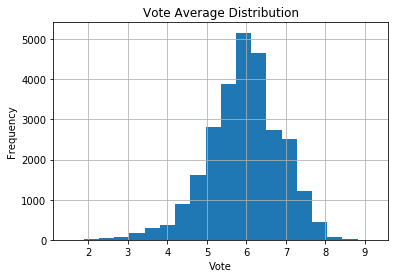

In [193]:
# 用这个代码框和其它代码框探索数据。请务必记得添加
#   Markdown 框，以便记录你的观察和调查结果。
df['vote_average'].hist(bins=20,figsize=(6,4))
plt.title('Vote Average Distribution')
plt.ylabel('Frequency')
plt.xlabel('Vote');

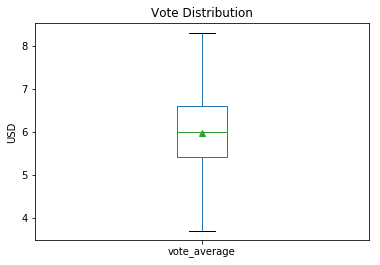

In [194]:
df['vote_average'].plot.box(showfliers=False,showmeans=True,figsize=(6,4))
plt.title('Vote Distribution')
plt.ylabel('USD');

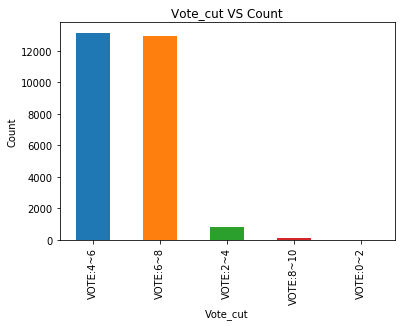

In [195]:
df['vote_cut'].value_counts().plot.bar(figsize=(6,4))
plt.title('Vote_cut VS Count')
plt.ylabel('Count')
plt.xlabel('Vote_cut');

数据成正态分布，评分大多集中在4分到8分之间。

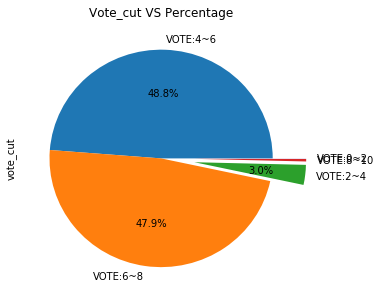

In [196]:
df.vote_cut.value_counts().plot.pie(explode = (0,0,0.3,0.3,0.3), autopct=lambda pct:'' if pct< 1 else "{:.1f}%".format(pct),figsize=(5,5))
plt.title('Vote_cut VS Percentage');

vote4~6与vote6~8占比一样，都是48%。

### 研究问题 2（投票次数排名前四的电影风格与评分的关系）

In [197]:
df_g.groupby(['vote_cut','genres5']).size().unstack()

genres5,Action,Comedy,Drama,Thriller
vote_cut,,,,
VOTE:0~2,2.0,NaN,NaN,NaN
VOTE:2~4,118.0,86.0,53.0,118.0
VOTE:4~6,1272.0,2015.0,1963.0,1657.0
VOTE:6~8,991.0,1689.0,2736.0,1132.0
VOTE:8~10,3.0,10.0,18.0,5.0


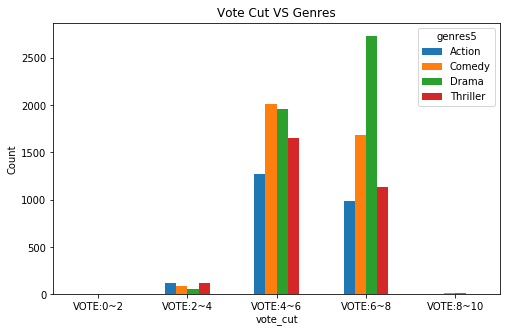

In [198]:
df_g.groupby(['vote_cut','genres5']).size().unstack().plot.bar(figsize=(8,5))
plt.title('Vote Cut VS Genres')
plt.xticks(rotation=0) # 控制 x 轴刻度文字的角度
plt.ylabel('Count');

在投票次数排名前四的电影类型中，大部分投票都集中在4至8分，在vote：4~6中Comedy和Drama次数相当，在vote：6~8中Drama次数最多。

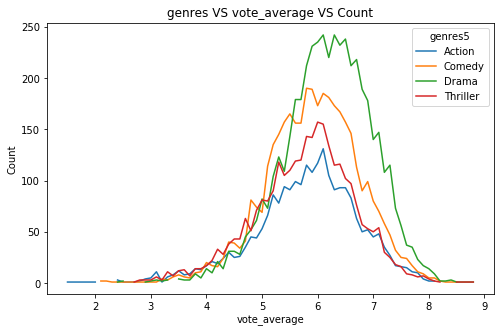

In [199]:
df_g.groupby(['vote_average','genres5']).size().unstack().plot(figsize=(8,5))
plt.title('genres VS vote_average VS Count')
plt.ylabel('Count');

5.5分之前，四种电影风格都差不多，5.5分之后，Drama比较靠前。

### 研究问题 3（探索预算与收益的关系）

Text(0.5,1,'revenue_adj VS budget_adj')

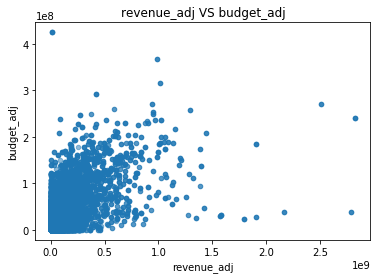

In [200]:
df.plot.scatter(x='revenue_adj',y='budget_adj',alpha=0.5)
plt.title('revenue_adj VS budget_adj')

In [201]:
df['revenue_adj'].corr(df['budget_adj'])

0.6436004623630778

投资与收益的相关性一般。

### 研究问题 4（探索平均投票分数与收益的关系）

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


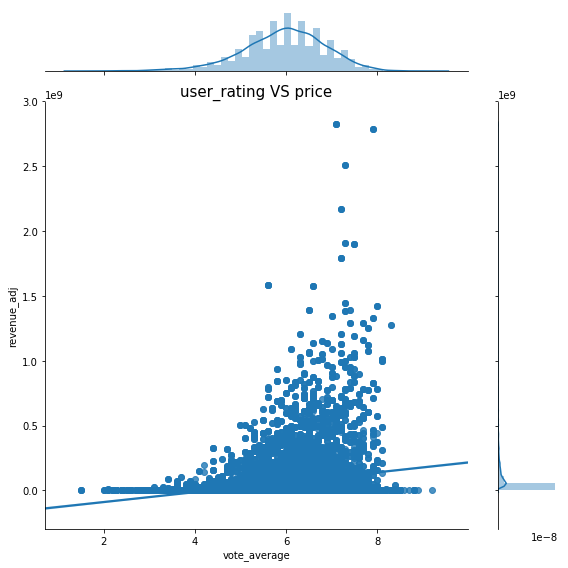

In [206]:
# df.plot.scatter(x='vote_average',y='revenue_adj',alpha=0.5)
# plt.title('user_rating VS price');
import seaborn as sns
sns.jointplot(data=df, y='revenue_adj', x='vote_average', kind="reg", size=8, space=0.5)
plt.title('user_rating VS price',fontsize=15)
plt.show()

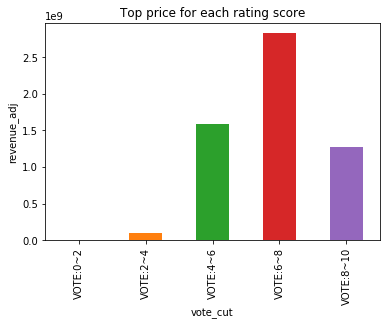

In [203]:
df.groupby('vote_cut')['revenue_adj'].max().plot.bar()
plt.title('Top price for each rating score')
plt.ylabel('revenue_adj');

In [204]:
df['vote_average'].corr(df['revenue_adj'])

0.21576415966947546

不具备相关性，较高的收益都集中在5到8分之间，评分高有可能有较高的收益。

<a id='conclusions'></a>
## 结论

- vote average评分大多集中在4分到8分之间。
- 在投票次数排名前四的电影类型中，大部分投票都集中在4至8分，在vote：4~6中Comedy和Drama次数相当，在vote：6~8中Drama次数最多。
- 投资与收益的相关性一般。
- 平均投票与收益不具备相关性，较高的收益都集中在5到8分之间，评分高有可能有较高的收益。